In [308]:
import pandas as pd
from pathlib import Path

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import xgboost as xgb

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression

import sys, os

import matplotlib.pyplot as plt

# Accuracy score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

from sklearn.neighbors import KNeighborsRegressor


from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
sys.path.append(os.path.abspath(os.path.join('..','./data/', './clean-data/')))
paths = sys.path
clean_path = [item for item in paths if "machine-learning-capstone\\data\\clean-data" in item]
clean_data = clean_path[0]

file_name_2022_1995 = "1995_2022_vehicle_fuel_consumption.csv"
pure_electric = "Battery-electric_vehicles_2012-2022_(2022-05-16).csv"
hybric_vehicle = "Plug-in_hybrid_electric_vehicles_2012-2022_(2022-03-28).csv"

master_df = pd.read_csv(Path(clean_data,f'{file_name_2022_1995}'))
electric_df = pd.read_csv(Path(clean_data,f'{pure_electric}'))
hybrid_df = pd.read_csv(Path(clean_data,f'{hybric_vehicle}'))
master_df['number_of_gears'].fillna(0, inplace=True)
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26159 entries, 0 to 26158
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   model_year                     26159 non-null  int64  
 1   make_                          26159 non-null  object 
 2   model.1_                       26159 non-null  object 
 3   vehicleclass_                  26159 non-null  object 
 4   enginesize_(l)                 26159 non-null  float64
 5   cylinders_                     26159 non-null  float64
 6   transmission_                  26159 non-null  object 
 7   fuel_type                      26159 non-null  object 
 8   fuelconsumption_city(l/100km)  26159 non-null  float64
 9   fuelconsumption_hwy(l/100km)   26159 non-null  float64
 10  fuelconsumption_comb(l/100km)  26159 non-null  float64
 11  fuelconsumption_comb(mpg)      26159 non-null  int64  
 12  co2emissions_(g/km)            26159 non-null 

In [3]:
non_na_rating = master_df[~master_df['co2_rating'].isna()]
non_na_rating_class = non_na_rating.copy()

non_na_rating_class['co2_rating'] = non_na_rating_class['co2_rating'].astype(int)

#non_na_rating_class.sort_values(by='co2_rating', inplace=True)

In [4]:
#non_na_rating_class['co2_rating'].unique()

In [5]:
Y = non_na_rating_class['co2_rating']

X = non_na_rating_class[['vehicleclass_','make_','model.1_','model_year','cylinders_','fuelconsumption_city(l/100km)','fuelconsumption_hwy(l/100km)',
                     'fuelconsumption_comb(l/100km)','fuelconsumption_comb(mpg)','co2emissions_(g/km)','number_of_gears']]


numeric_features =  ['model_year','cylinders_','fuelconsumption_city(l/100km)','fuelconsumption_hwy(l/100km)',
                     'fuelconsumption_comb(l/100km)','fuelconsumption_comb(mpg)','co2emissions_(g/km)','number_of_gears']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),("scaler", StandardScaler())]
)

categorical_features = ['vehicleclass_','make_','model.1_']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        #("cat", categorical_transformer, categorical_features),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
y_test.value_counts()

5     381
4     325
3     261
6     171
7     140
2      80
8      29
1      23
9      17
10      8
Name: co2_rating, dtype: int64

In [7]:
def train_and_evaluate_model(X_train, y_train, X_test, y_test, model_pipeline, model_name):
    
    model_pipeline.fit(X_train, y_train.values.ravel())


    # Predict
    y_pred = model_pipeline.predict(X_test)
    
    # Obtain accuracy score
    acc = accuracy_score(y_test, y_pred)
    print('accuracy is',accuracy_score(y_pred,y_test))
    
    score_train = model_pipeline.score(X_train, y_train)
    score_test = model_pipeline.score(X_test, y_test)
    print('score for training set', score_train, 'score for testing set', score_test)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    print("Balanced accuracy score", balanced_accuracy)
    
    report = classification_report(y_test, y_pred)
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
    _ = ax.set_title(
        f"Confusion Matrix for {model_name}"
    )
    
    plt.show()
    
    print(report, sep=',')
    
    


accuracy is 0.8397212543554007
score for training set 0.8246164574616457 score for testing set 0.8397212543554007
Balanced accuracy score 0.7879794866139627


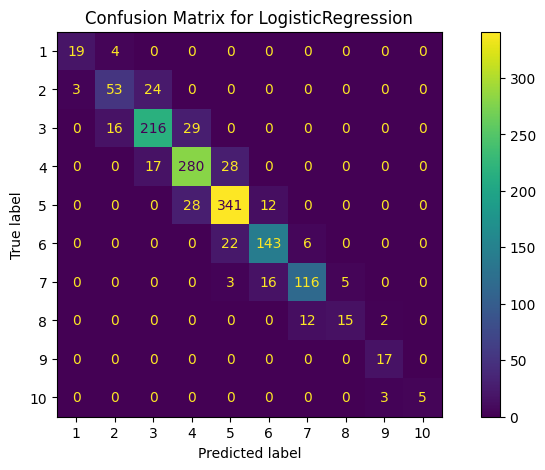

              precision    recall  f1-score   support

           1       0.86      0.83      0.84        23
           2       0.73      0.66      0.69        80
           3       0.84      0.83      0.83       261
           4       0.83      0.86      0.85       325
           5       0.87      0.90      0.88       381
           6       0.84      0.84      0.84       171
           7       0.87      0.83      0.85       140
           8       0.75      0.52      0.61        29
           9       0.77      1.00      0.87        17
          10       1.00      0.62      0.77         8

    accuracy                           0.84      1435
   macro avg       0.84      0.79      0.80      1435
weighted avg       0.84      0.84      0.84      1435



In [8]:
import numpy as np
model_classifier = Pipeline(
    steps=[("preprocessor", preprocessor), ("LogisticRegression", LogisticRegression(multi_class='multinomial', 
                                                                                     solver='newton-cg',
                                                                                     max_iter=150,
                                                                                     random_state=0), )] #colsample  by tree, n estimators, max depth
                                                                    )

train_and_evaluate_model(X_train, y_train, X_test, y_test, model_classifier,"LogisticRegression")

accuracy is 0.9770034843205575
score for training set 0.9994769874476988 score for testing set 0.9770034843205575
Balanced accuracy score 0.956635875514339


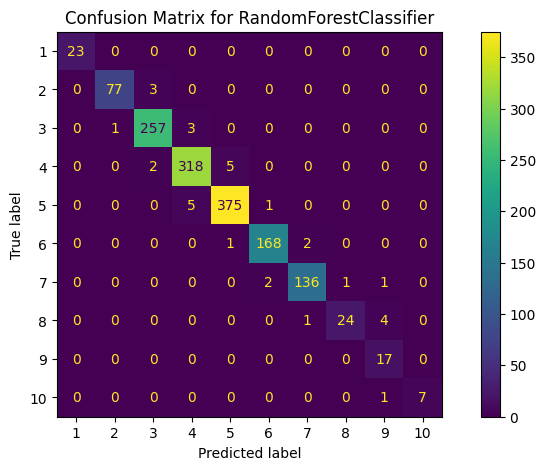

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.99      0.96      0.97        80
           3       0.98      0.98      0.98       261
           4       0.98      0.98      0.98       325
           5       0.98      0.98      0.98       381
           6       0.98      0.98      0.98       171
           7       0.98      0.97      0.97       140
           8       0.96      0.83      0.89        29
           9       0.74      1.00      0.85        17
          10       1.00      0.88      0.93         8

    accuracy                           0.98      1435
   macro avg       0.96      0.96      0.95      1435
weighted avg       0.98      0.98      0.98      1435



In [9]:
model_classifier_rf = Pipeline(
    steps=[("preprocessor", preprocessor), ("RandomForestClass", RandomForestClassifier(max_depth=100, random_state=0), )] #colsample  by tree, n estimators, max depth
                                                                    )
train_and_evaluate_model(X_train, y_train, X_test, y_test, model_classifier_rf,"RandomForestClassifier")

accuracy is 0.9344947735191638
score for training set 0.9701882845188284 score for testing set 0.9344947735191638
Balanced accuracy score 0.8968019870491897


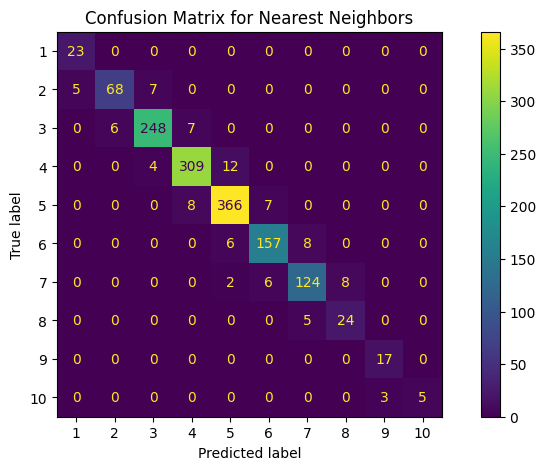

              precision    recall  f1-score   support

           1       0.82      1.00      0.90        23
           2       0.92      0.85      0.88        80
           3       0.96      0.95      0.95       261
           4       0.95      0.95      0.95       325
           5       0.95      0.96      0.95       381
           6       0.92      0.92      0.92       171
           7       0.91      0.89      0.90       140
           8       0.75      0.83      0.79        29
           9       0.85      1.00      0.92        17
          10       1.00      0.62      0.77         8

    accuracy                           0.93      1435
   macro avg       0.90      0.90      0.89      1435
weighted avg       0.94      0.93      0.93      1435



In [10]:
model_classifier_rf = Pipeline(
    steps=[("preprocessor", preprocessor), ("Nearest Neighbors", KNeighborsClassifier(3), )] #colsample  by tree, n estimators, max depth
                                                                    )
train_and_evaluate_model(X_train, y_train, X_test, y_test, model_classifier_rf,"Nearest Neighbors")

(array([ 138.,  383., 1237., 1634., 1889.,  918.,  654.,  180.,   86.,
          52.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

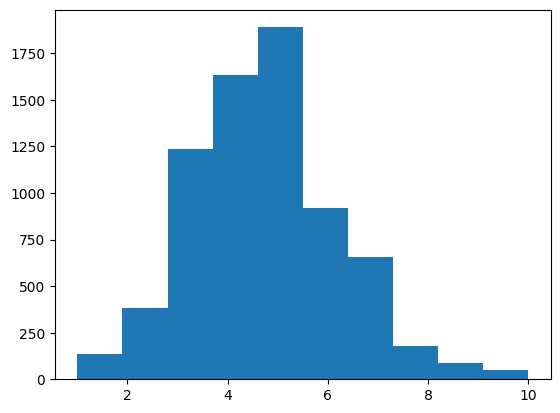

In [11]:
import seaborn as sns
plt.hist(x=non_na_rating['co2_rating'])

accuracy is 0.8306620209059233
score for training set 0.8108437935843794 score for testing set 0.8306620209059233
Balanced accuracy score 0.7764927434749265


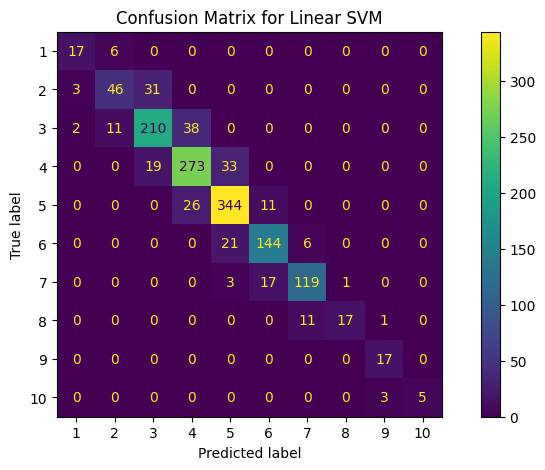

              precision    recall  f1-score   support

           1       0.77      0.74      0.76        23
           2       0.73      0.57      0.64        80
           3       0.81      0.80      0.81       261
           4       0.81      0.84      0.82       325
           5       0.86      0.90      0.88       381
           6       0.84      0.84      0.84       171
           7       0.88      0.85      0.86       140
           8       0.94      0.59      0.72        29
           9       0.81      1.00      0.89        17
          10       1.00      0.62      0.77         8

    accuracy                           0.83      1435
   macro avg       0.84      0.78      0.80      1435
weighted avg       0.83      0.83      0.83      1435



In [12]:
model_classifier_rf = Pipeline(
    steps=[("preprocessor", preprocessor), ("Linear SVM", SVC(kernel="linear", C=0.025), )] #colsample  by tree, n estimators, max depth
                                                                    )
train_and_evaluate_model(X_train, y_train, X_test, y_test, model_classifier_rf,"Linear SVM")

Review https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

#### Things to try

1. Class balancing using oversampling techniques (smote), look for imbalanced-learn https://imbalanced-learn.org/stable/ 

2. Reduce bias of dataset by using undersampling (random undersampler) 

3. Pick 3 or four models, then ensemble them. With this, we can build a more robust system. Use voting classifier (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html). Another technique we can use is stacking.



Nearest Neighbors
accuracy is 0.9344947735191638
score for training set 0.9701882845188284 score for testing set 0.9344947735191638
Balanced accuracy score 0.8968019870491897


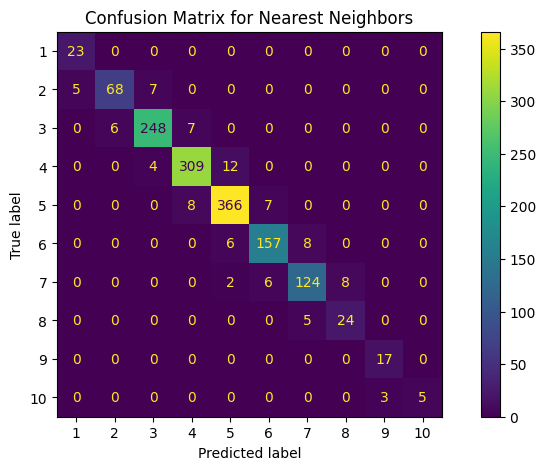

              precision    recall  f1-score   support

           1       0.82      1.00      0.90        23
           2       0.92      0.85      0.88        80
           3       0.96      0.95      0.95       261
           4       0.95      0.95      0.95       325
           5       0.95      0.96      0.95       381
           6       0.92      0.92      0.92       171
           7       0.91      0.89      0.90       140
           8       0.75      0.83      0.79        29
           9       0.85      1.00      0.92        17
          10       1.00      0.62      0.77         8

    accuracy                           0.93      1435
   macro avg       0.90      0.90      0.89      1435
weighted avg       0.94      0.93      0.93      1435

----------------
Linear SVM
accuracy is 0.8306620209059233
score for training set 0.8108437935843794 score for testing set 0.8306620209059233
Balanced accuracy score 0.7764927434749265


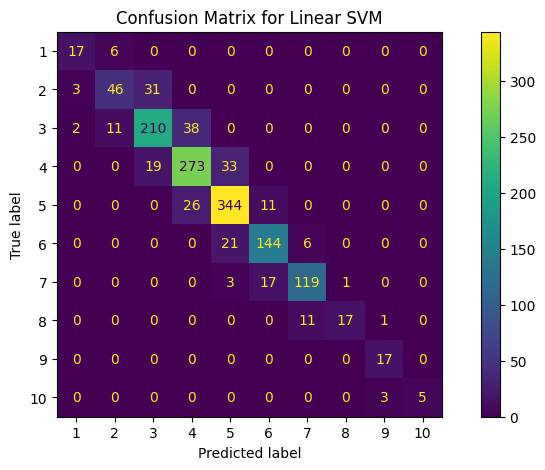

              precision    recall  f1-score   support

           1       0.77      0.74      0.76        23
           2       0.73      0.57      0.64        80
           3       0.81      0.80      0.81       261
           4       0.81      0.84      0.82       325
           5       0.86      0.90      0.88       381
           6       0.84      0.84      0.84       171
           7       0.88      0.85      0.86       140
           8       0.94      0.59      0.72        29
           9       0.81      1.00      0.89        17
          10       1.00      0.62      0.77         8

    accuracy                           0.83      1435
   macro avg       0.84      0.78      0.80      1435
weighted avg       0.83      0.83      0.83      1435

----------------
RBF SVM
accuracy is 0.956794425087108
score for training set 0.9773361227336123 score for testing set 0.956794425087108
Balanced accuracy score 0.9500334261363707


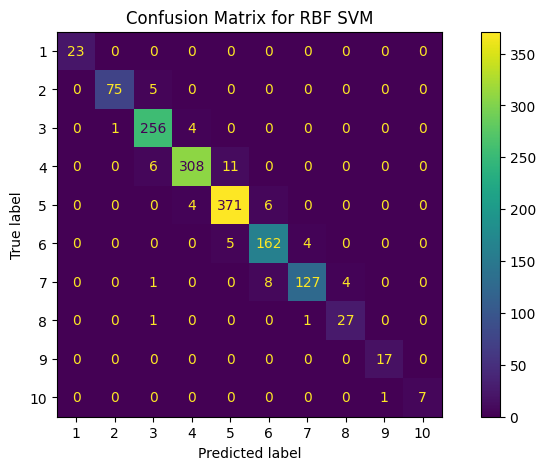

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.99      0.94      0.96        80
           3       0.95      0.98      0.97       261
           4       0.97      0.95      0.96       325
           5       0.96      0.97      0.97       381
           6       0.92      0.95      0.93       171
           7       0.96      0.91      0.93       140
           8       0.87      0.93      0.90        29
           9       0.94      1.00      0.97        17
          10       1.00      0.88      0.93         8

    accuracy                           0.96      1435
   macro avg       0.96      0.95      0.95      1435
weighted avg       0.96      0.96      0.96      1435

----------------
Decision Tree
accuracy is 0.9909407665505227
score for training set 0.9994769874476988 score for testing set 0.9909407665505227
Balanced accuracy score 0.9735190884049025


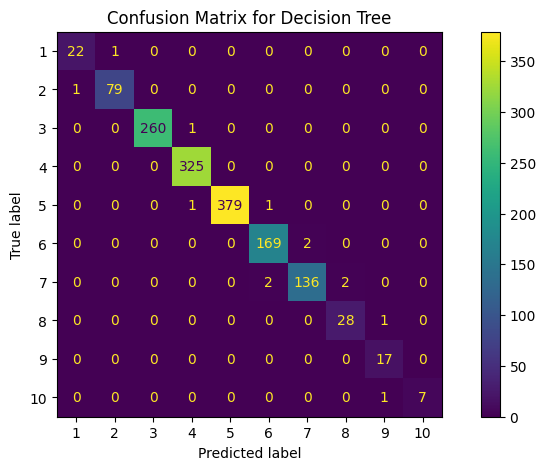

              precision    recall  f1-score   support

           1       0.96      0.96      0.96        23
           2       0.99      0.99      0.99        80
           3       1.00      1.00      1.00       261
           4       0.99      1.00      1.00       325
           5       1.00      0.99      1.00       381
           6       0.98      0.99      0.99       171
           7       0.99      0.97      0.98       140
           8       0.93      0.97      0.95        29
           9       0.89      1.00      0.94        17
          10       1.00      0.88      0.93         8

    accuracy                           0.99      1435
   macro avg       0.97      0.97      0.97      1435
weighted avg       0.99      0.99      0.99      1435

----------------
Random Forest
accuracy is 0.9721254355400697
score for training set 0.9973849372384938 score for testing set 0.9721254355400697
Balanced accuracy score 0.9502190468899524


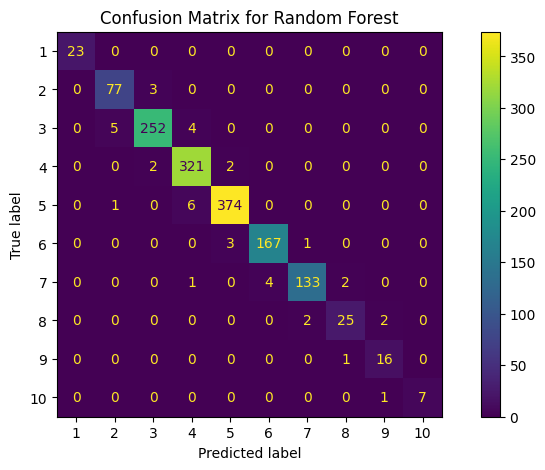

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.93      0.96      0.94        80
           3       0.98      0.97      0.97       261
           4       0.97      0.99      0.98       325
           5       0.99      0.98      0.98       381
           6       0.98      0.98      0.98       171
           7       0.98      0.95      0.96       140
           8       0.89      0.86      0.88        29
           9       0.84      0.94      0.89        17
          10       1.00      0.88      0.93         8

    accuracy                           0.97      1435
   macro avg       0.96      0.95      0.95      1435
weighted avg       0.97      0.97      0.97      1435

----------------
Neural Net
accuracy is 0.8829268292682927
score for training set 0.8804044630404463 score for testing set 0.8829268292682927
Balanced accuracy score 0.7868869234051675


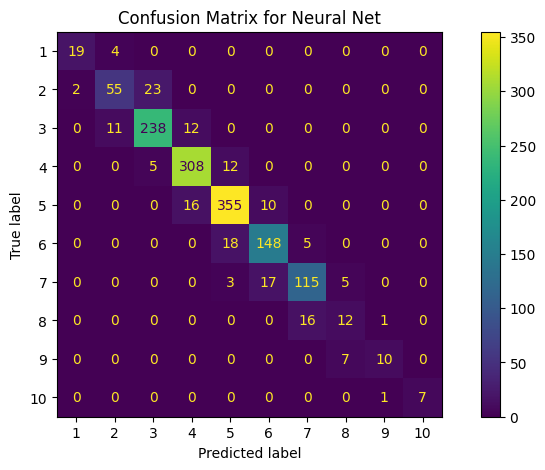

              precision    recall  f1-score   support

           1       0.90      0.83      0.86        23
           2       0.79      0.69      0.73        80
           3       0.89      0.91      0.90       261
           4       0.92      0.95      0.93       325
           5       0.91      0.93      0.92       381
           6       0.85      0.87      0.86       171
           7       0.85      0.82      0.83       140
           8       0.50      0.41      0.45        29
           9       0.83      0.59      0.69        17
          10       1.00      0.88      0.93         8

    accuracy                           0.88      1435
   macro avg       0.84      0.79      0.81      1435
weighted avg       0.88      0.88      0.88      1435

----------------
AdaBoost
accuracy is 0.4641114982578397
score for training set 0.45746164574616455 score for testing set 0.4641114982578397
Balanced accuracy score 0.2849941449626489


C:\anaconda3\envs\ml-project-env-10\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\envs\ml-project-env-10\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\envs\ml-project-env-10\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


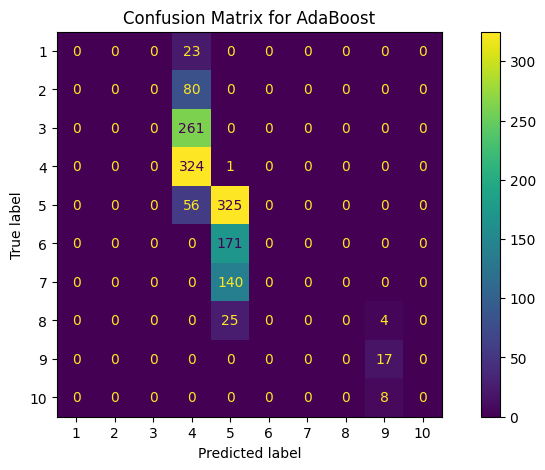

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00        80
           3       0.00      0.00      0.00       261
           4       0.44      1.00      0.61       325
           5       0.49      0.85      0.62       381
           6       0.00      0.00      0.00       171
           7       0.00      0.00      0.00       140
           8       0.00      0.00      0.00        29
           9       0.59      1.00      0.74        17
          10       0.00      0.00      0.00         8

    accuracy                           0.46      1435
   macro avg       0.15      0.28      0.20      1435
weighted avg       0.24      0.46      0.31      1435

----------------
Naive Bayes
accuracy is 0.7526132404181185
score for training set 0.7515690376569037 score for testing set 0.7526132404181185
Balanced accuracy score 0.7963489888161647


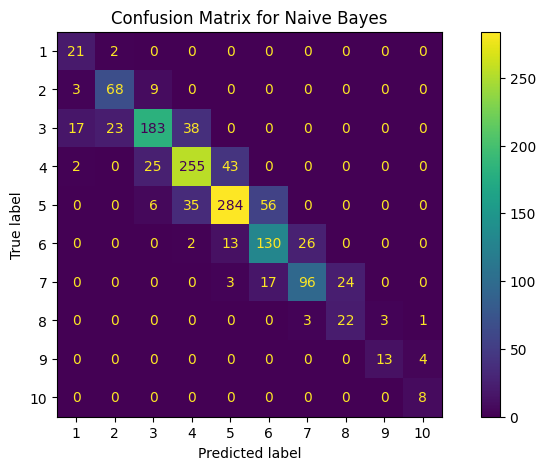

              precision    recall  f1-score   support

           1       0.49      0.91      0.64        23
           2       0.73      0.85      0.79        80
           3       0.82      0.70      0.76       261
           4       0.77      0.78      0.78       325
           5       0.83      0.75      0.78       381
           6       0.64      0.76      0.70       171
           7       0.77      0.69      0.72       140
           8       0.48      0.76      0.59        29
           9       0.81      0.76      0.79        17
          10       0.62      1.00      0.76         8

    accuracy                           0.75      1435
   macro avg       0.70      0.80      0.73      1435
weighted avg       0.77      0.75      0.76      1435

----------------
QDA
accuracy is 0.8229965156794425
score for training set 0.8239191073919108 score for testing set 0.8229965156794425
Balanced accuracy score 0.808450904335762


C:\anaconda3\envs\ml-project-env-10\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


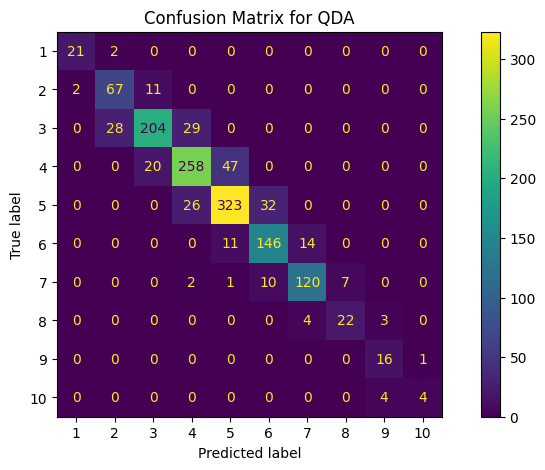

              precision    recall  f1-score   support

           1       0.91      0.91      0.91        23
           2       0.69      0.84      0.76        80
           3       0.87      0.78      0.82       261
           4       0.82      0.79      0.81       325
           5       0.85      0.85      0.85       381
           6       0.78      0.85      0.81       171
           7       0.87      0.86      0.86       140
           8       0.76      0.76      0.76        29
           9       0.70      0.94      0.80        17
          10       0.80      0.50      0.62         8

    accuracy                           0.82      1435
   macro avg       0.80      0.81      0.80      1435
weighted avg       0.83      0.82      0.82      1435

----------------


In [13]:

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=100),
    RandomForestClassifier(max_depth=100, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


for name, clf in zip(names, classifiers):
    print(name)
    
    model = Pipeline(
        steps=[("preprocessor", preprocessor), (name, clf, )] #colsample  by tree, n estimators, max depth
                                                                    )
    train_and_evaluate_model(X_train, y_train, X_test, y_test, model,name)
    
    print("----------------")

In [195]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.utils import to_categorical
# Import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

In [161]:


target = to_categorical(non_na_rating_class[['co2_rating']])


X = non_na_rating_class[['cylinders_','fuelconsumption_city(l/100km)','fuelconsumption_hwy(l/100km)',
                     'fuelconsumption_comb(l/100km)','fuelconsumption_comb(mpg)','co2emissions_(g/km)','number_of_gears']]

X_ = X.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_, target, test_size=0.2, random_state=42)

n_cols = X_.shape[1]
print(n_cols)

7


In [302]:
model1 = Sequential()

# add input layer
# add more dense layers, add loss ('categorical_crossentropy'), optimizer "adam" or "sgd", change size of neurons, add/remove layers, play with activation function (relu, tanh)
model1.add(InputLayer(input_shape=(n_cols,)))
model1.add(Dense(500, activation='relu'))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(11, activation='softmax'))

model1.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=5)

model1 = model1.fit(X_train, 
                    y_train, 
                    epochs=300, 
                    validation_split=0.2, 
                    callbacks=[early_stopping_monitor],
                    validation_data=(X_test, y_test)
                   )

Epoch 1/300
180/180 [==============================] - 1s 3ms/step - loss: 1.7484 - accuracy: 0.4104 - val_loss: 1.1694 - val_accuracy: 0.5345
Epoch 2/300
180/180 [==============================] - 0s 2ms/step - loss: 0.9878 - accuracy: 0.5839 - val_loss: 1.0370 - val_accuracy: 0.5756
Epoch 3/300
180/180 [==============================] - 0s 2ms/step - loss: 0.8105 - accuracy: 0.6573 - val_loss: 0.6951 - val_accuracy: 0.6648
Epoch 4/300
180/180 [==============================] - 0s 2ms/step - loss: 0.7074 - accuracy: 0.6846 - val_loss: 0.8482 - val_accuracy: 0.6808
Epoch 5/300
180/180 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.7085 - val_loss: 0.6040 - val_accuracy: 0.7359
Epoch 6/300
180/180 [==============================] - 0s 2ms/step - loss: 0.5937 - accuracy: 0.7357 - val_loss: 0.5390 - val_accuracy: 0.7484
Epoch 7/300
180/180 [==============================] - 0s 2ms/step - loss: 0.6081 - accuracy: 0.7289 - val_loss: 0.4826 - val_accuracy: 0.7833

In [303]:
model2 = Sequential()

# add input layer
# add more dense layers, add loss ('categorical_crossentropy'), optimizer "adam" or "sgd", change size of neurons, add/remove layers, play with activation function (relu, tanh)
model2.add(InputLayer(input_shape=(n_cols,)))
model2.add(Dense(100, activation='tanh'))
model2.add(Dense(100, activation='tanh'))
model2.add(Dense(11, activation='softmax'))

model2.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=5)

model2 = model2.fit(X_train, 
                    y_train, 
                    epochs=300, 
                    validation_split=0.2, 
                    callbacks=[early_stopping_monitor],
                   validation_data=(X_test, y_test))

Epoch 1/300
180/180 [==============================] - 1s 2ms/step - loss: 1.3139 - accuracy: 0.5207 - val_loss: 0.8632 - val_accuracy: 0.7436
Epoch 2/300
180/180 [==============================] - 0s 2ms/step - loss: 0.8129 - accuracy: 0.6747 - val_loss: 0.7042 - val_accuracy: 0.7059
Epoch 3/300
180/180 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.7036 - val_loss: 0.6389 - val_accuracy: 0.7561
Epoch 4/300
180/180 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.7193 - val_loss: 0.6611 - val_accuracy: 0.7289
Epoch 5/300
180/180 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.7294 - val_loss: 0.5636 - val_accuracy: 0.7652
Epoch 6/300
180/180 [==============================] - 0s 2ms/step - loss: 0.5828 - accuracy: 0.7415 - val_loss: 0.5859 - val_accuracy: 0.7589
Epoch 7/300
180/180 [==============================] - 0s 2ms/step - loss: 0.5645 - accuracy: 0.7502 - val_loss: 0.5283 - val_accuracy: 0.7798

### First model

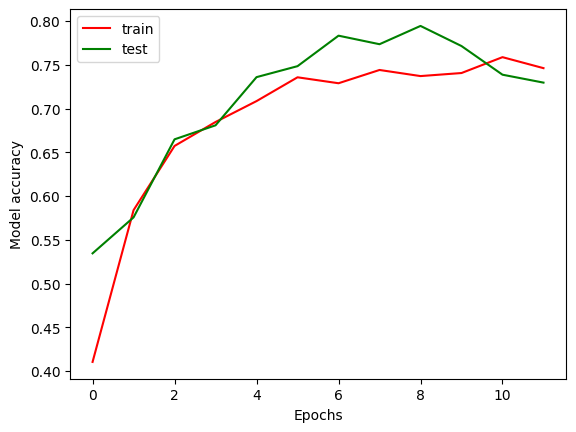

In [304]:
# Create the plot
plt.plot(model1.history['accuracy'], 'r',  model1.history['val_accuracy'],'g')
plt.xlabel('Epochs')
plt.ylabel('Model accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

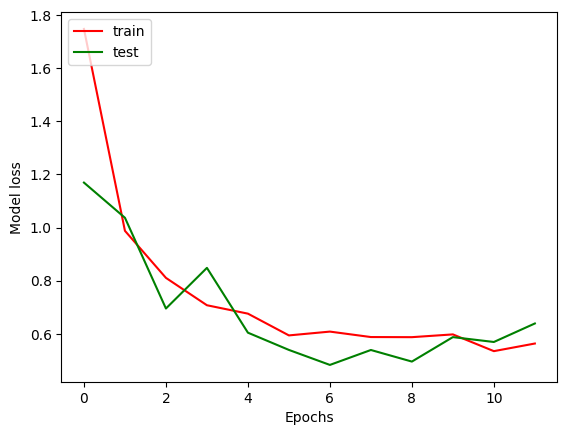

In [305]:
# Create the plot
plt.plot(model1.history['loss'], 'r',  model1.history['val_loss'],'g')
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Second model

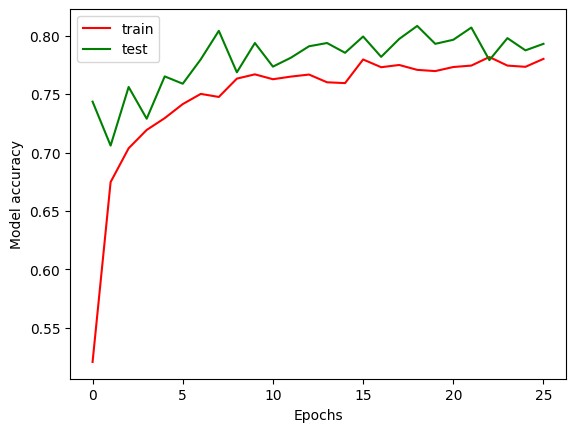

In [306]:
plt.plot(model2.history['accuracy'], 'r',  model2.history['val_accuracy'],'g')
plt.xlabel('Epochs')
plt.ylabel('Model accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

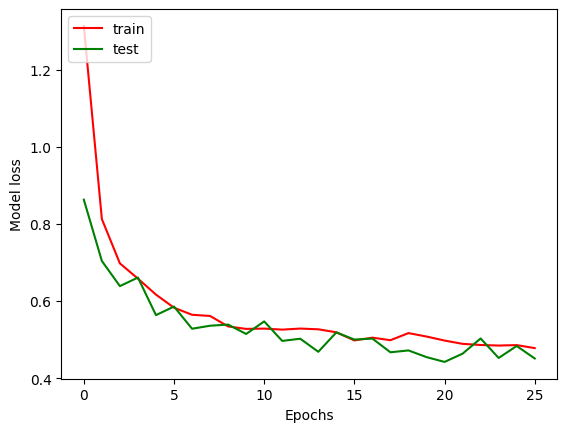

In [307]:
plt.plot(model2.history['loss'], 'r',  model2.history['val_loss'],'g')
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Comparing models

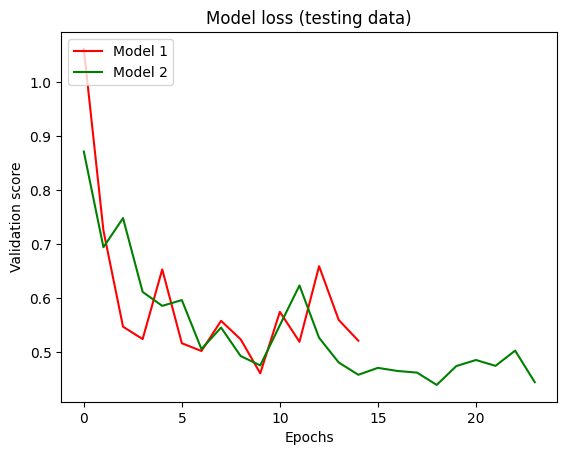

In [291]:
# Create the plot
plt.plot(model1.history['val_loss'], 'r',  model2.history['val_loss'],'g')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.legend(['Model 1', 'Model 2'], loc='upper left')
plt.title("Model loss (testing data)")

plt.show()

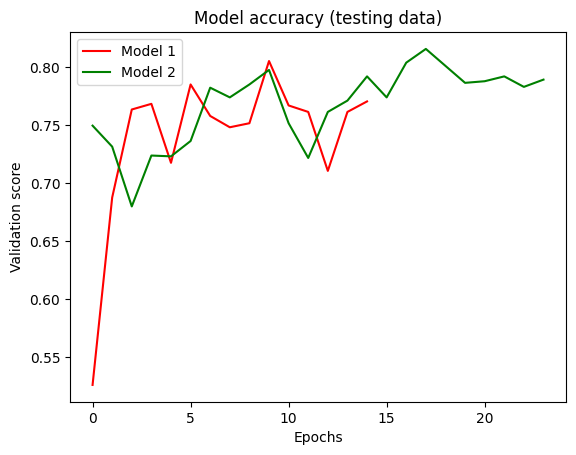

In [290]:
# Create the plot
plt.plot(model1.history['val_accuracy'], 'r', model2.history['val_accuracy'],'g')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.legend(['Model 1', 'Model 2'], loc='upper left')
plt.title("Model accuracy (testing data)")

plt.show()

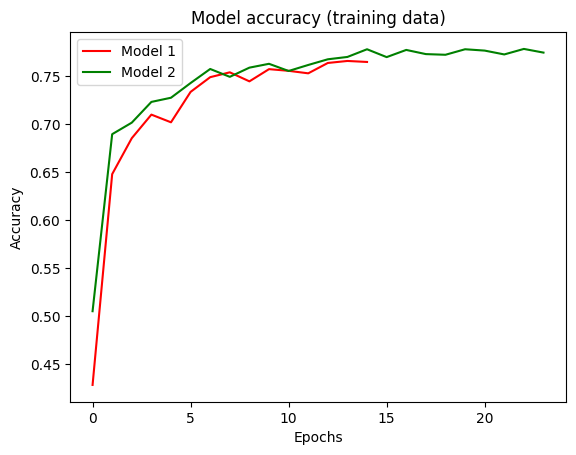

In [289]:
# Create the plot
plt.plot(model1.history['accuracy'], 'r', model2.history['accuracy'],'g')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Model 1', 'Model 2'], loc='upper left')
plt.legend(['Model 1', 'Model 2'], loc='upper left')
plt.title("Model accuracy (training data)")

plt.show()

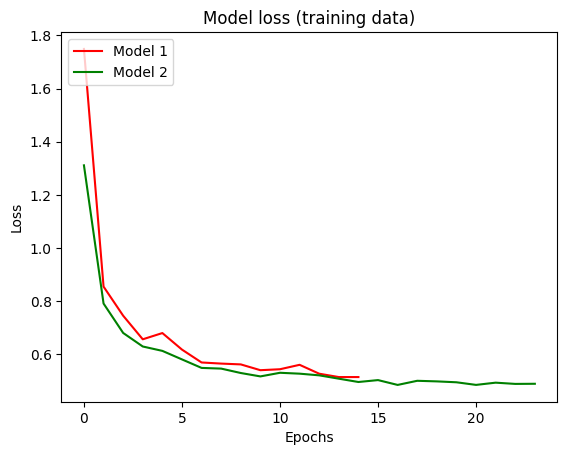

In [288]:
# Create the plot
plt.plot(model1.history['loss'], 'r', model2.history['loss'],'g')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Model 1', 'Model 2'], loc='upper left')
plt.title("Model loss (training data)")
plt.show()

In [296]:
model1

In [297]:
#predictions = model1.predict(X_test)
